In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

In [2]:
myDF = pd.read_csv("/Users/rauns/Downloads/310_23498_compressed_creditcard.csv/creditcard.csv")

In [3]:
print(myDF.shape)

(284807, 31)


In [4]:
print(myDF.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(myDF.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# check for null values
myDF.isnull().sum().max()

0

0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class Distributions:\n 0 = No Fraud and 1 = Fraud')

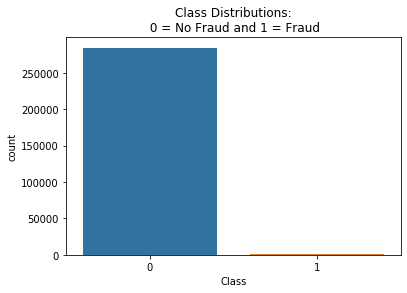

In [7]:
# check class distribution to see imbalanced dataset
print(myDF["Class"].value_counts())
sns.countplot('Class', data = myDF)
plt.title('Class Distributions:\n 0 = No Fraud and 1 = Fraud')

In [8]:
# Change time to minutes and hours to better understand data
timedelta = pd.to_timedelta(myDF['Time'], unit='s')
myDF['Time_min'] = (timedelta.dt.components.minutes).astype(int)
myDF['Time_hrs'] = (timedelta.dt.components.hours).astype(int)

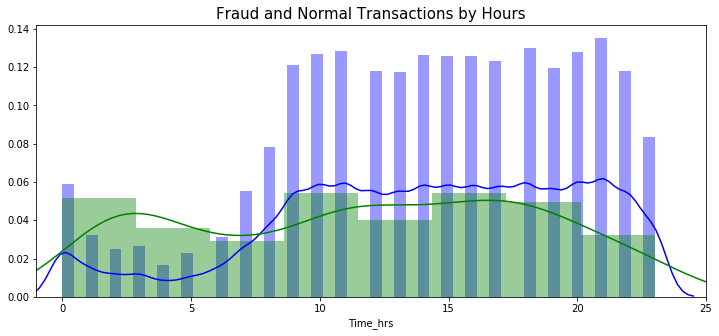

In [9]:
# hours
plt.figure(figsize=(12,5))
sns.distplot(myDF[myDF['Class'] == 0]["Time_hrs"], 
             color='b')
sns.distplot(myDF[myDF['Class'] == 1]["Time_hrs"], 
             color='g')
plt.title('Fraud and Normal Transactions by Hours', fontsize=15)
plt.xlim([-1,25])
plt.show()

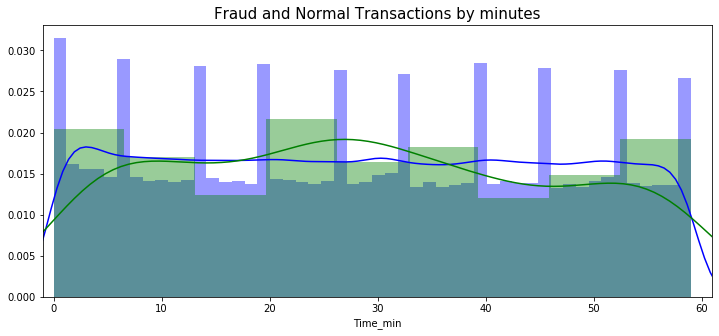

In [10]:
# minutes
plt.figure(figsize=(12,5))
sns.distplot(myDF[myDF['Class'] == 0]["Time_min"], 
             color='b')
sns.distplot(myDF[myDF['Class'] == 1]["Time_min"], 
             color='g')
plt.title('Fraud and Normal Transactions by minutes', fontsize=15)
plt.xlim([-1,61])
plt.show()

In [11]:
fraud = myDF[myDF['Class'] == 1]
no_fraud = myDF[myDF['Class'] == 0]

print("Fraud transaction statistics")
print(fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(no_fraud["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [12]:
# Feature engineering for better visualization
# Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.
myDF['Amount_log'] = np.log(myDF.Amount + 0.01)

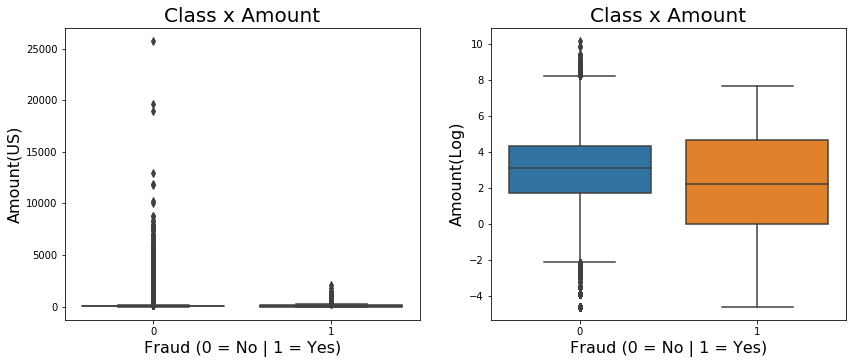

In [13]:
# Distribution of Amount Transactions by Class (Fraud or No Fraud)
plt.figure(figsize=(14,6))

plt.subplot(121)
ax = sns.boxplot(x = "Class", y = "Amount", data = myDF)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Fraud (0 = No | 1 = Yes)", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class", y = "Amount_log", data = myDF)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Fraud (0 = No | 1 = Yes)", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

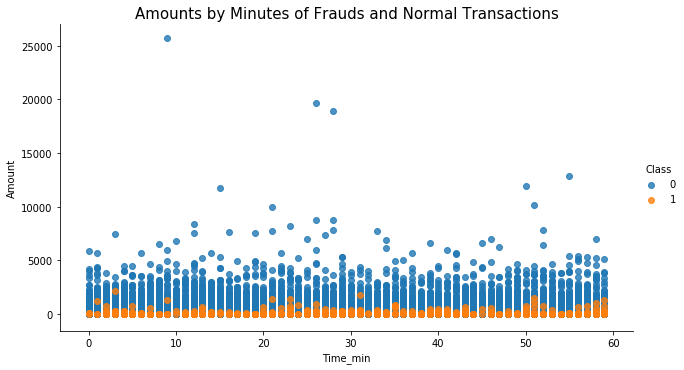

In [14]:
# Looking a Scatter Plot of the Amount and time_min distribuition of Fraud transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg = False, aspect = 1.8, data=myDF, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=15)
plt.show()

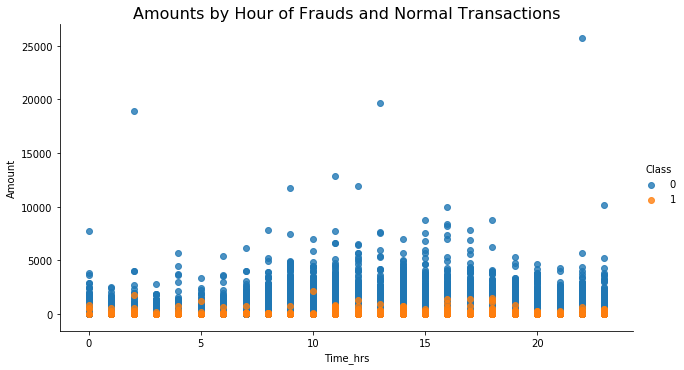

In [15]:
# Looking a Scatter Plot of the Amount and time_hrs distribuition of Fraud transactions
ax = sns.lmplot(y = "Amount", x = "Time_hrs", fit_reg = False, aspect = 1.8, data = myDF, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

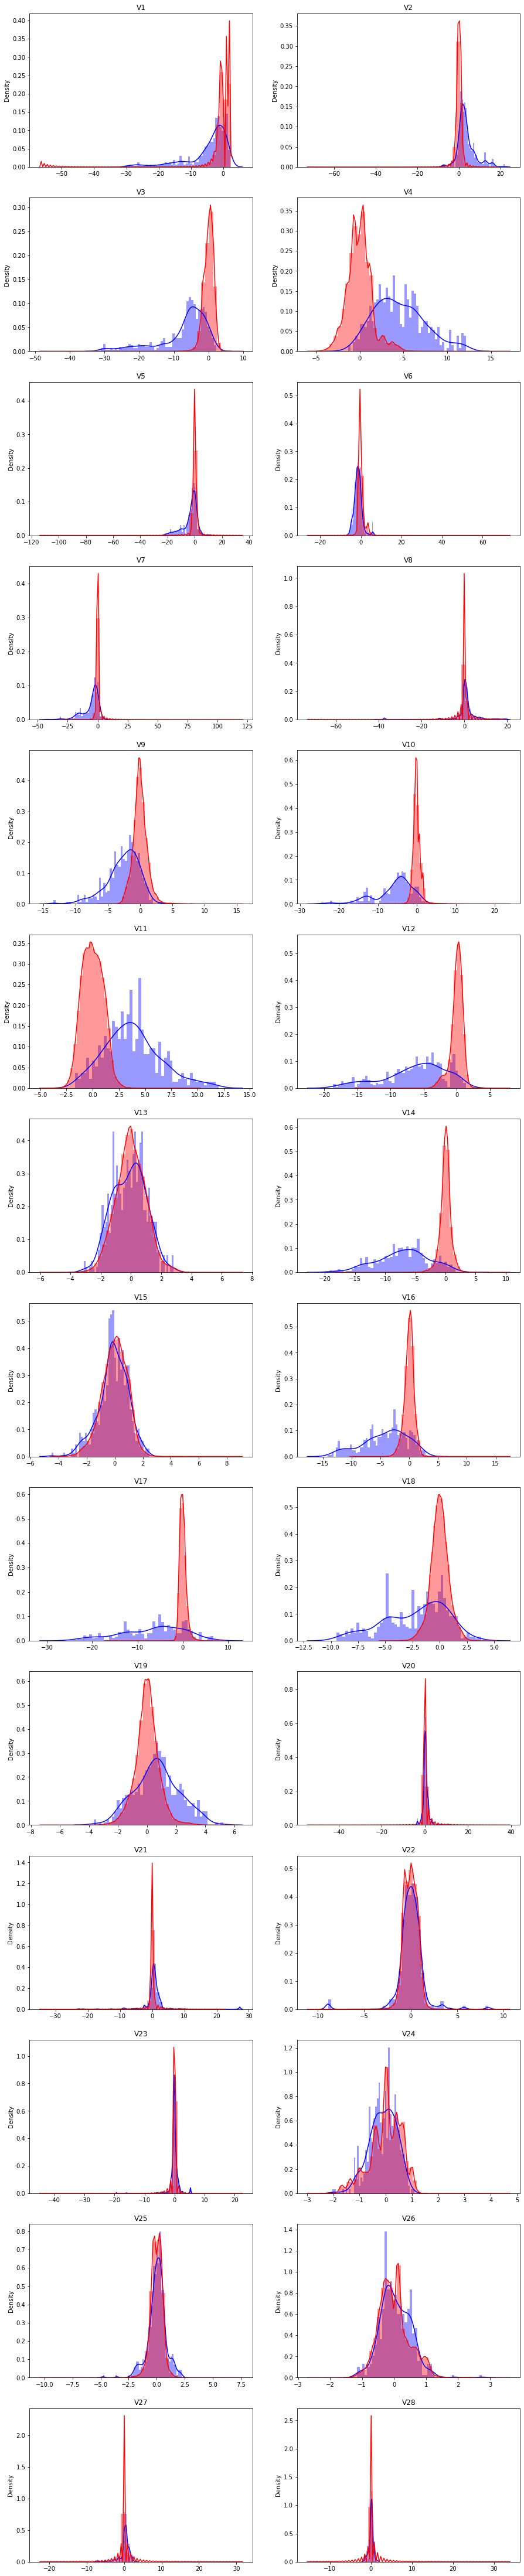

In [16]:
# Distributions of each V Column
columns = myDF.iloc[:,1:29].columns

fraud_trans = (myDF.Class == 1)
regular_trans = (myDF.Class == 0)

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(myDF[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(myDF[col][fraud_trans], bins = 50, color='b') 
    sns.distplot(myDF[col][regular_trans], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [17]:
# Selecting the variables where fraud class have a interesting behavior and might help us predict

myDF = myDF[["Time_hrs","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

In [18]:
# more feature engineering
myDF.Amount = np.log(myDF.Amount + 0.001)

In [19]:
myDF.head()

,Time_hrs,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


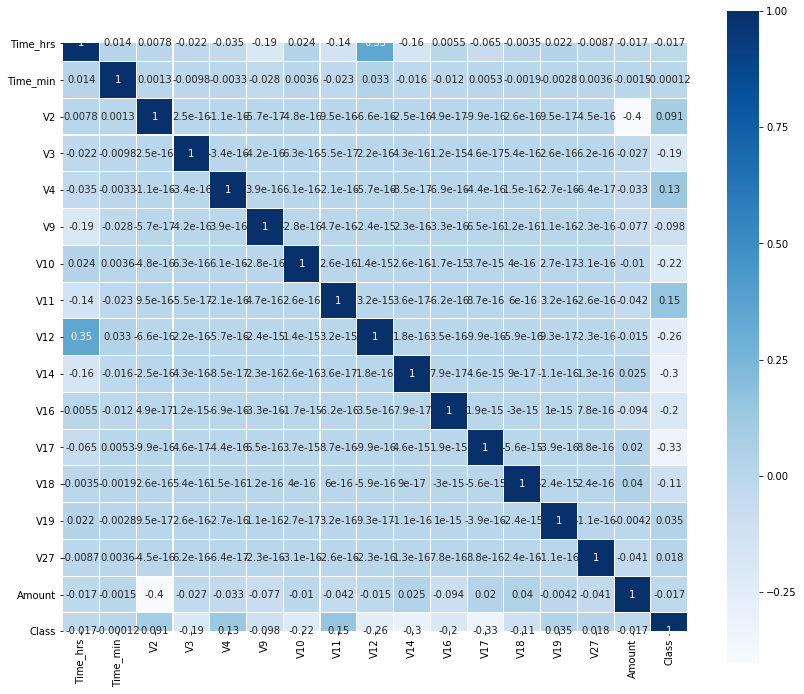

In [20]:
#A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

plt.figure(figsize=(14,12))

sns.heatmap(myDF.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = plt.cm.Blues, linecolor='white', annot=True)

plt.show()

In [21]:
# Preprocessing the data
# For this project, I will use the SMOTE technique to handle the data imbalance

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [22]:
X = myDF.drop(['Class'], axis = 1).values
y = myDF['Class'].values # transforming the data into an array

In [23]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

# We will use Random Forest as the classifier
classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


In [24]:
# Construction of a Confusion Matrix
# In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[56867    11]
 [   12    72]]

SMOTE Pipeline Score 0.9995962220427653

SMOTE + RandomForest classification
accuracy: 0.9995962220427653
precision: 0.8674698795180723
recall: 0.8571428571428571
f2: 0.8591885441527445


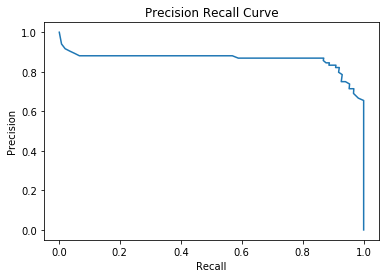

In [25]:
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [27]:
# parameters of the model
param_grid = {"max_depth": [3,5, None], "n_estimators":[3,5,10], "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [28]:
grid_search = GridSearchCV(model, param_grid = param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [29]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7841915085817526
{'max_depth': 5, 'max_features': 7, 'n_estimators': 5}


In [30]:
# Running the fit
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [31]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9995216045996181


In [43]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("Results of RF classification", y_test, y_pred)

[[56871     7]
 [   17    67]]
Results of RF classification
accuracy: 0.9995786664794073
precision: 0.9054054054054054
recall: 0.7976190476190477
f2: 0.8170731707317074


In [37]:
# ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, smote_prediction)

0.9284747303752895

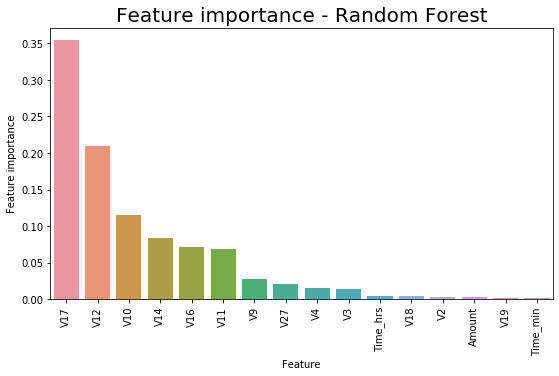

In [38]:
# Feature Importance Plot
features = ["Time_min","Time_hrs","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount"]

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Feature importance - Random Forest',fontsize=20)
plt.show() 

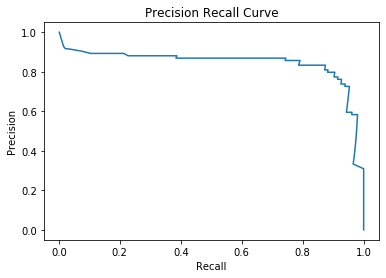

In [35]:
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [45]:
print(cross_val_score(rf, X_train, y_train, cv=10, scoring='recall'))

[0.75609756 0.73170732 0.73170732 0.65853659 0.80487805 0.775
 0.725      0.85365854 0.80487805 0.70731707]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.87      0.86      0.86        84

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
# Testing on original data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=2, test_size=0.20)
y_pred_og = rf.predict(X_test1)
print(confusion_matrix(y_test1, y_pred_og))

[[56871     7]
 [   17    67]]
